=== Descriptive Statistics ===
             sales      visits
count     9.000000    9.000000
mean    395.000000  124.666667
std     305.859445   65.901442
min     220.000000   95.000000
25%     275.000000  100.000000
50%     300.000000  104.000000
75%     310.000000  107.000000
max    1200.000000  300.000000


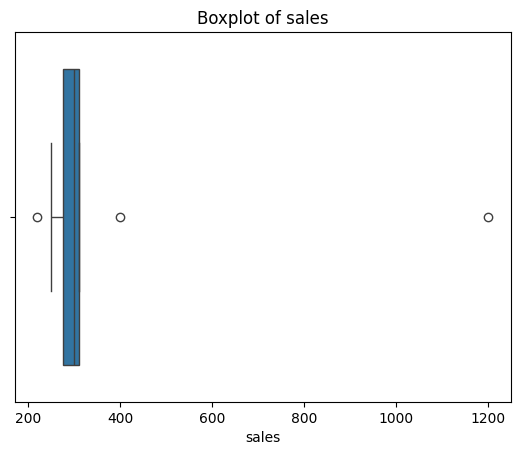

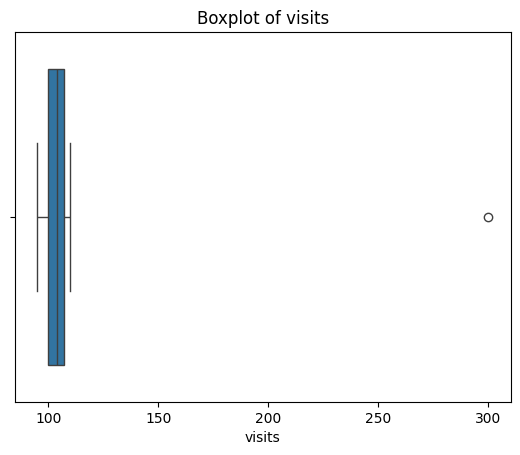


=== Outliers Detected ===
sales outliers:
   sales  visits
2    220     110
3    400      95
8   1200     300

visits outliers:
   sales  visits
8   1200     300



In [1]:
# Question: Advanced Data Profiling and Outlier Detection
# Description: Perform detailed data profiling including outlier detection for numeric columns.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample dataset
data = pd.DataFrame({
    'sales': [250, 300, 220, 400, 300, 275, 310, 300, 1200],  # 1200 is an outlier
    'visits': [100, 105, 110, 95, 102, 99, 107, 104, 300]     # 300 is an outlier
})

# Step 1: Descriptive Statistics
print("=== Descriptive Statistics ===")
print(data.describe())

# Step 2: Box Plot Visualization for Outlier Detection
for col in data.select_dtypes(include='number').columns:
    plt.figure()
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# Step 3: Outlier Detection using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

print("\n=== Outliers Detected ===")
for col in data.select_dtypes(include='number').columns:
    outliers = detect_outliers_iqr(data, col)
    print(f"{col} outliers:\n{outliers}\n")

